### **AMERICAN INTERNATIONAL UNIVERSITY-BANGLADESH (AIUB)**  
**Name:** AZMINUR RAHMAN  
**ID:** 22-46588-1  
**Course:** MACHINE LEARNING  
**Section:** F  
**Course Teacher:** DR. MD. ASRAF ALI  

---

**Assignment 1**

**Instructions:**  
Explain the feature extraction techniques and extract various types of features from an image using Python.

---
---


**Image Upload**
- **Purpose:** The image is loaded from the local machine for further processing.
- **Functionality:**
  - The image is read in BGR format using OpenCV.
  - It is then converted to RGB for visualization.
  - A grayscale version is prepared for techniques requiring single-channel input.
- **Applications:** The image is preprocessed for all subsequent feature extraction techniques.

Upload your image file:


Saving ImageForFeatureExtraction.png to ImageForFeatureExtraction.png


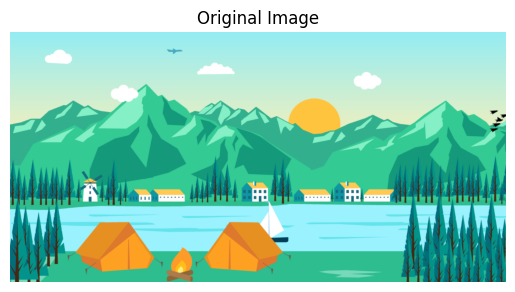

In [1]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Step 1: Upload the image
print("Upload your image file:")
uploaded = files.upload()

# Step 2: Load the uploaded image
image_path = list(uploaded.keys())[0]  # Get the file name
image = cv2.imread(image_path)  # Load image in BGR format (OpenCV default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to Grayscale

# Original Image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

**Feature 1: Color Histogram**
- **Technique:** Color Histogram
- **Purpose:** The distribution of pixel intensities for each color channel (Red, Green, and Blue) is analyzed.
- **Functionality:**
  - Histograms are calculated for each color channel using `cv2.calcHist`.
  - These histograms are plotted to show the frequency of pixel intensities.
- **Applications:**
  - Image retrieval is facilitated.
  - Color-based classification or segmentation is enabled.
  - Dominant colors in an image are detected.

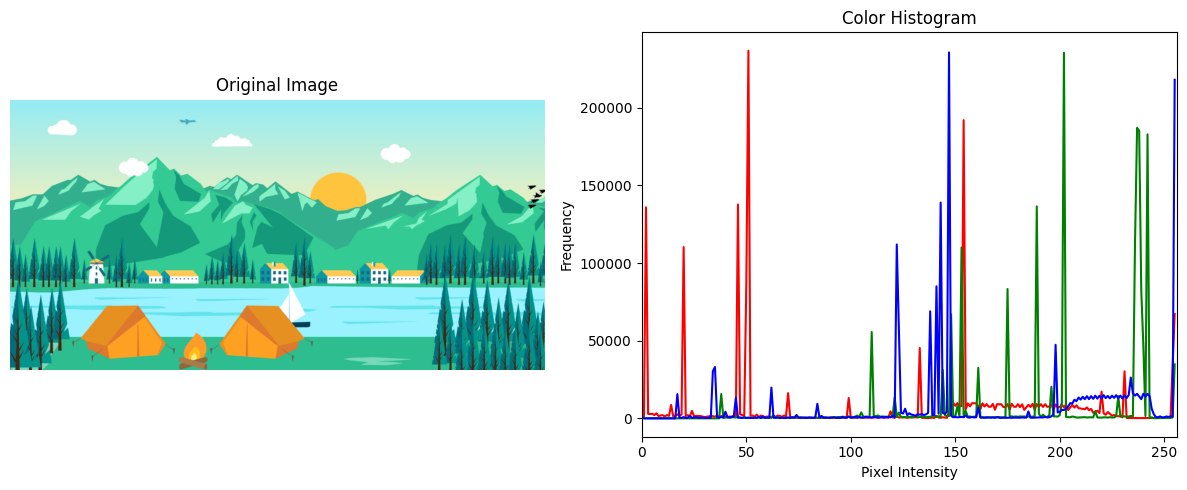

In [2]:
# Feature Extraction: Color Histogram
def extract_color_histogram(image_rgb):
    # Plot side-by-side (0, 0) and (0, 1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original Image (0, 0)
    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Generated Histogram
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
        axes[1].plot(hist, color=color)
    axes[1].set_xlim([0, 256])
    axes[1].set_title("Color Histogram")
    axes[1].set_xlabel("Pixel Intensity")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

extract_color_histogram(image_rgb)

**Feature 2: Edge Detection (Canny)**
- **Technique:** Canny Edge Detection
- **Purpose:** The boundaries of objects are identified by detecting regions where intensity changes sharply.
- **Functionality:**
  - Gradient-based edge detection is applied, with thresholds set for strong and weak edges.
  - A binary image is generated, highlighting the detected edges.
- **Applications:**
  - Object detection is supported.
  - Contour extraction is enabled for shape analysis.
  - Lane detection is facilitated for autonomous vehicles.

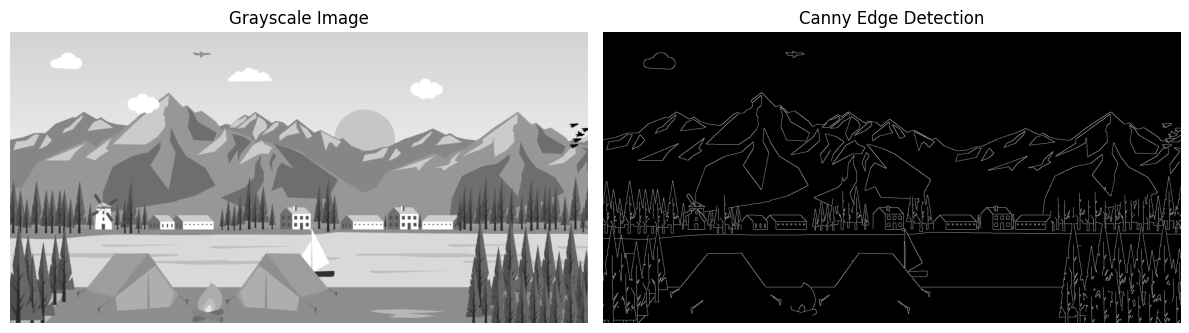

In [3]:
# Feature Extraction: Edge Detection
def extract_edges(gray_image):
    # Perform Canny edge detection
    edges = cv2.Canny(gray_image, 100, 200)

    # Plot side-by-side (0, 0) and (0, 1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original Image
    axes[0].imshow(gray_image, cmap='gray')
    axes[0].set_title("Grayscale Image")
    axes[0].axis('off')

    # Generated Edges
    axes[1].imshow(edges, cmap='gray')
    axes[1].set_title("Canny Edge Detection")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

extract_edges(gray_image)

**Feature 3: Texture Features (LBP)**
- **Technique:** Local Binary Patterns (LBP)
- **Purpose:** Texture information is extracted by encoding local pixel intensity patterns.
- **Functionality:**
  - The intensity of a pixel’s neighbors is compared relative to its own value.
  - A binary pattern is generated for each pixel, representing texture details.
- **Applications:**
  - Texture classification is performed.
  - Facial recognition is supported by detecting unique facial textures.
  - Surface inspection is enabled in manufacturing processes.

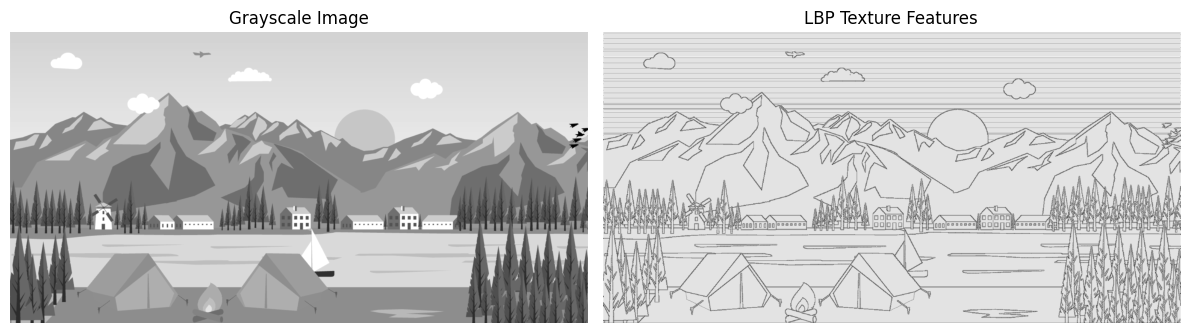

In [4]:
from skimage.feature import local_binary_pattern

# Feature Extraction: Local Binary Patterns (LBP)
def extract_texture_features(gray_image):
    # Compute LBP
    radius = 1
    n_points = 8 * radius
    lbp = local_binary_pattern(gray_image, n_points, radius, method="uniform")

    # Plot side-by-side (0, 0) and (0, 1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original Image
    axes[0].imshow(gray_image, cmap="gray")
    axes[0].set_title("Grayscale Image")
    axes[0].axis('off')

    # Generated LBP Features
    axes[1].imshow(lbp, cmap="gray")
    axes[1].set_title("LBP Texture Features")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

extract_texture_features(gray_image)

**Feature 4: Keypoint Detection (SIFT)**
- **Technique:** Scale-Invariant Feature Transform (SIFT)
- **Purpose:** Distinctive keypoints in the image are detected, ensuring invariance to scale, rotation, and illumination.
- **Functionality:**
  - Keypoints are identified using a difference-of-Gaussian approach.
  - Descriptors that represent these keypoints are computed.
  - The detected keypoints are visualized as markers or circles.
- **Applications:**
  - Object recognition and tracking are enabled.
  - Image stitching, such as in panoramic photos, is facilitated.
  - Feature-based image matching is supported.

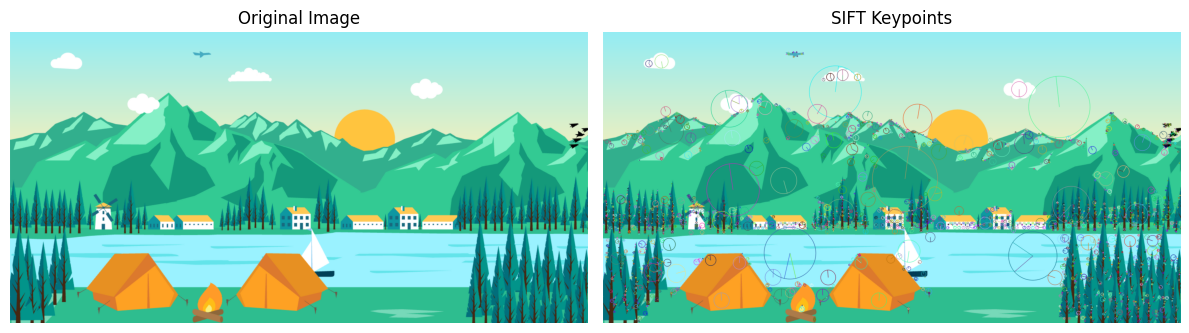

In [5]:
# Feature Extraction: Keypoint Detection (SIFT)
def extract_keypoints(gray_image, image_rgb):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    sift_image = cv2.drawKeypoints(image_rgb, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Plot side-by-side (0, 0) and (0, 1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original Image
    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Generated SIFT Keypoints (0, 1)
    axes[1].imshow(sift_image)
    axes[1].set_title("SIFT Keypoints")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

extract_keypoints(gray_image, image_rgb)

**Feature 5: Shape Features (HOG)**
- **Technique:** Histogram of Oriented Gradients (HOG)
- **Purpose:** Shape information is encoded by capturing the distribution of gradient orientations.
- **Functionality:**
  - The image is divided into small cells.
  - Gradient histograms are computed for each cell.
  - These histograms are normalized across blocks for consistency.
  - A feature vector representing the image’s shape is produced.
- **Applications:**
  - Pedestrian detection is supported.
  - Object detection is enabled in images or videos.
  - Image classification tasks are performed.

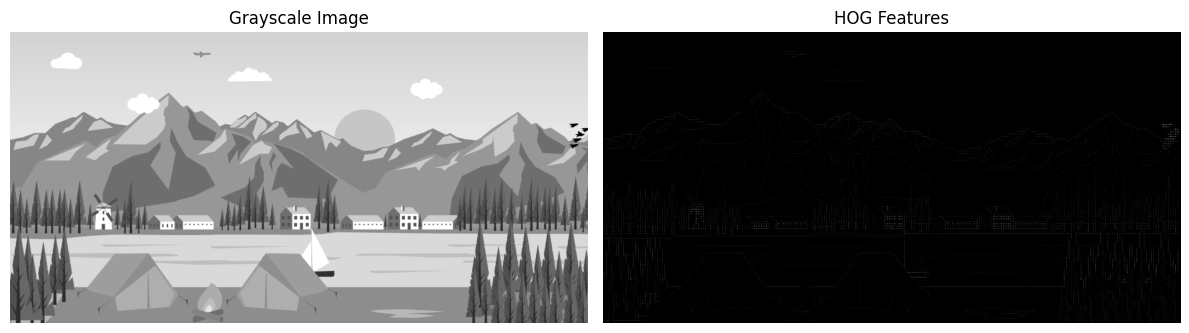

In [6]:
from skimage.feature import hog

# Feature Extraction: HOG
def extract_hog_features(gray_image):
    hog_features, hog_image = hog(
        gray_image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True,
        channel_axis=None
    )

    # Plot side-by-side (0, 0) and (0, 1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original Image
    axes[0].imshow(gray_image, cmap="gray")
    axes[0].set_title("Grayscale Image")
    axes[0].axis('off')

    # Generated HOG Features
    axes[1].imshow(hog_image, cmap="gray")
    axes[1].set_title("HOG Features")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

extract_hog_features(gray_image)

**Feature 6: Deep Learning Features (VGG16)**
- **Technique:** Pre-Trained Convolutional Neural Networks (VGG16)
- **Purpose:** High-level semantic features are extracted using a pre-trained deep learning model.
- **Functionality:**
  - A pre-trained VGG16 model from TensorFlow/Keras is loaded.
  - The image is resized to match the input size required (224x224 pixels).
  - Features are extracted from the convolutional layers (excluding the fully connected layers).
  - A high-dimensional feature tensor is generated.
- **Applications:**
  - Image classification tasks are supported.
  - Object detection is integrated as part of a larger pipeline.
  - Transfer learning is enabled for tasks like image segmentation.

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step


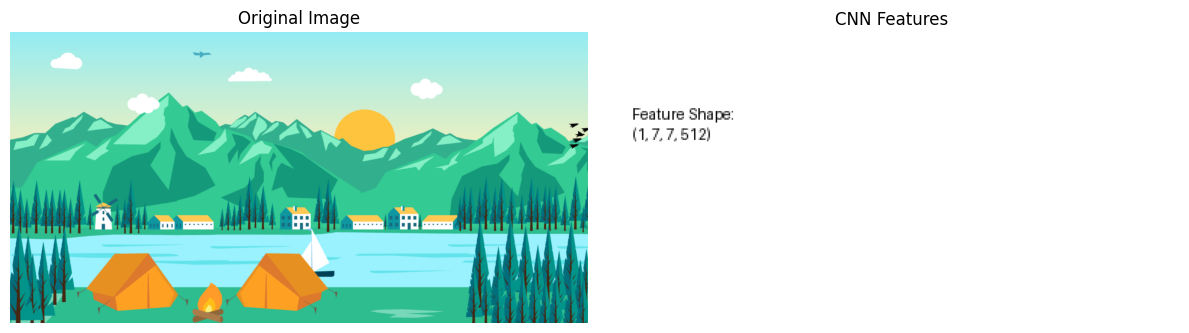

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image, ImageDraw

# Feature Extraction: VGG16
def extract_cnn_features(image_rgb):
    model = VGG16(weights="imagenet", include_top=False)

    # Preprocess the image for VGG16
    resized_image = cv2.resize(image_rgb, (224, 224))
    image_array = np.expand_dims(resized_image, axis=0)
    image_array = preprocess_input(image_array)
    features = model.predict(image_array)

    # Create a blank image for text display
    text_image = Image.new('RGB', (400, 200), color='white')
    draw = ImageDraw.Draw(text_image)

    # Add text about feature shape
    text_content = f"Feature Shape:\n{features.shape}"
    draw.text((20, 50), text_content, fill="black")

    # Convert the PIL image to a NumPy array for Matplotlib
    text_image_np = np.array(text_image)

    # Plot side-by-side: Original Image and Generated Output Info
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original Image
    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Generated Output Info as Image
    axes[1].imshow(text_image_np)
    axes[1].set_title("CNN Features")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

extract_cnn_features(image_rgb)

---
---

| **Section**          | **Feature Extraction Technique** | **Purpose**                                                  | **Applications**                                            |
|-----------------------|----------------------------------|--------------------------------------------------------------|------------------------------------------------------------|
| **Feature 1**         | Color Histogram                 | The pixel intensity distribution for each color channel is analyzed. | Image retrieval, classification, segmentation are enabled. |
| **Feature 2**         | Canny Edge Detection            | Object boundaries are identified.                            | Object detection, contour analysis, and lane detection are facilitated. |
| **Feature 3**         | Local Binary Patterns (LBP)     | Texture information is encoded.                              | Texture classification and facial recognition are supported. |
| **Feature 4**         | SIFT                            | Distinctive keypoints are detected.                          | Image matching, object recognition, and stitching are performed. |
| **Feature 5**         | Histogram of Oriented Gradients | Shape and edge direction information is encoded.             | Pedestrian detection and object classification are supported. |
| **Feature 6**         | Pre-Trained CNN (VGG16)         | High-level features are extracted using deep learning.       | Transfer learning and image classification are performed. |